In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import regularizers

In [1]:
path = '../input/credit-card-fraud-detection/'
file = path + 'creditcard.csv'

In [6]:
import io
df_card = pd.read_csv("../input/credit-card-fraud-detection/creditcard.csv")

In [7]:
df_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df_card.shape

(284807, 31)

In [8]:
df_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df_card.size

8829017

In [12]:
df_card[df_card.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [13]:
normalized_data=df_card.copy()

In [23]:
non_fraud=df_card[df_card["Class"]==0]
fraud = df_card[df_card["Class"]==1]
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [24]:
non_fraud=non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [25]:
data = fraud.append(non_fraud, ignore_index=True)
data.shape
data["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [26]:
x_data= data.drop(columns=["Class", "Time"], axis=0)
label = data["Class"]

In [27]:
train_data, test_data, train_labels, test_labels=train_test_split(x_data, label, test_size=0.3, random_state=0, stratify = label)

In [28]:
train_data.shape, test_data.shape

((688, 29), (296, 29))

In [29]:
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data = (train_data-mean)/std
test_data = (test_data-mean)/std

In [30]:
train_labels=np.asarray(train_labels).astype(dtype="float64")
test_labels=np.asarray(test_labels).astype(dtype="float64")

In [31]:
model= models.Sequential()
model.add(layers.Dense(10, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu", input_shape=(train_data.shape[1],)))

model.add(layers.Dense(10, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(8,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(6,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [32]:
history=model.fit(train_data, train_labels, epochs=100, validation_split=.2)

Epoch 1/100
18/18 [==============================] - 1s 20ms/step - loss: 0.8489 - accuracy: 0.5906 - val_loss: 0.8132 - val_accuracy: 0.7536
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.7848 - accuracy: 0.7811 - val_loss: 0.7626 - val_accuracy: 0.7754
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.7235 - accuracy: 0.8406 - val_loss: 0.7112 - val_accuracy: 0.7899
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6761 - accuracy: 0.8643 - val_loss: 0.6593 - val_accuracy: 0.8116
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6424 - accuracy: 0.8505 - val_loss: 0.6159 - val_accuracy: 0.8188
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5811 - accuracy: 0.8925 - val_loss: 0.5658 - val_accuracy: 0.8551
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5112 - accuracy: 0.9176 - val_loss: 0.5278 - val_accuracy: 0.8551
Epoch 8/100


Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2112 - accuracy: 0.9591 - val_loss: 0.3009 - val_accuracy: 0.9348
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2171 - accuracy: 0.9510 - val_loss: 0.2951 - val_accuracy: 0.9348
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 0.1768 - accuracy: 0.9720 - val_loss: 0.2830 - val_accuracy: 0.9420
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1765 - accuracy: 0.9748 - val_loss: 0.2864 - val_accuracy: 0.9348
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 0.1789 - accuracy: 0.9689 - val_loss: 0.2843 - val_accuracy: 0.9420
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 0.1618 - accuracy: 0.9745 - val_loss: 0.2920 - val_accuracy: 0.9348
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 0.1735 - accuracy: 0.9726 - val_loss: 0.2887 - val_accuracy: 0.9348
Epoch 

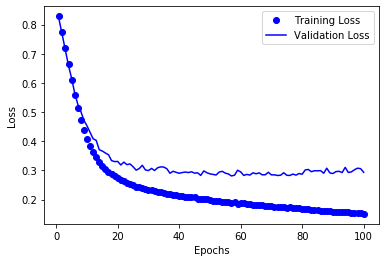

In [33]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

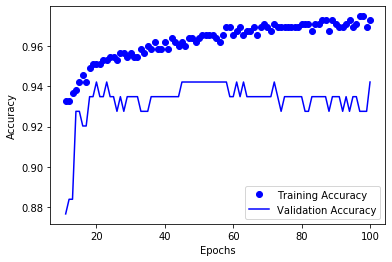

In [34]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs=range(1, len(acc)+1)
plt.plot(epochs[10:], acc[10:], "bo", label="Training Accuracy")
plt.plot(epochs[10:], val_acc[10:], "b", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [35]:
model= models.Sequential()
model.add(layers.Dense(10, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu", input_shape=(train_data.shape[1],)))

model.add(layers.Dense(10, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(8,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(6,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [36]:
model.fit(train_data, train_labels, epochs=100)

Epoch 1/100
22/22 [==============================] - 1s 1ms/step - loss: 0.8539 - accuracy: 0.4848
Epoch 2/100
22/22 [==============================] - 0s 1ms/step - loss: 0.8245 - accuracy: 0.6614
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7921 - accuracy: 0.7340
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7372 - accuracy: 0.8145
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.8586
Epoch 6/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6400 - accuracy: 0.8772
Epoch 7/100
22/22 [==============================] - 0s 1ms/step - loss: 0.5911 - accuracy: 0.8985
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.9062
Epoch 9/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4979 - accuracy: 0.9031
Epoch 10/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.9104
Epoch 11/

22/22 [==============================] - 0s 1ms/step - loss: 0.1707 - accuracy: 0.9621
Epoch 84/100
22/22 [==============================] - 0s 1ms/step - loss: 0.1892 - accuracy: 0.9542
Epoch 85/100
22/22 [==============================] - 0s 1ms/step - loss: 0.1646 - accuracy: 0.9721
Epoch 86/100
22/22 [==============================] - 0s 1ms/step - loss: 0.1814 - accuracy: 0.9600
Epoch 87/100
22/22 [==============================] - 0s 1ms/step - loss: 0.1631 - accuracy: 0.9732
Epoch 88/100
22/22 [==============================] - 0s 1ms/step - loss: 0.1746 - accuracy: 0.9703
Epoch 89/100
22/22 [==============================] - 0s 1ms/step - loss: 0.1487 - accuracy: 0.9771
Epoch 90/100
22/22 [==============================] - 0s 1ms/step - loss: 0.1667 - accuracy: 0.9636
Epoch 91/100
22/22 [==============================] - 0s 1ms/step - loss: 0.1531 - accuracy: 0.9742
Epoch 92/100
22/22 [==============================] - 0s 1ms/step - loss: 0.1551 - accuracy: 0.9697
Epoch 93/100


In [37]:
test_loss_score, test_acc_score=model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 1ms/step - loss: 0.3515 - accuracy: 0.9088


In [38]:
test_acc_score *100

90.87837934494019

In [39]:
prediction=model.predict(test_data) #astype(dtype="u8")
pred_norm =np.where(prediction>.5, 1, 0)

pred_norm[:10].T

array([[0, 0, 1, 0, 1, 0, 1, 0, 0, 1]])

In [40]:
prediction[:10].T

array([[0.00500521, 0.01740804, 0.99985427, 0.06836289, 0.9999982 ,
        0.01010096, 0.8388064 , 0.11082247, 0.01018971, 0.99937725]],
      dtype=float32)

In [41]:
test_labels[:].astype(dtype="int")

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [42]:
pred_check =pred_norm[:].T.astype(dtype="int")

In [43]:
c = pred_check.size
pred_check

array([[0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
        1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 1]]

In [44]:
comapre_pred_test = test_labels == pred_check

In [45]:
a = comapre_pred_test[comapre_pred_test[:]== False].size
a

27

In [46]:
b = comapre_pred_test[comapre_pred_test[:]==True].size
b

269

In [47]:
print("Incorrect Predictions are:", a, "and Correct predictions are :", b, " the percentage is:", round((b/c)*100,2), "%"  )

Incorrect Predictions are: 27 and Correct predictions are : 269  the percentage is: 90.88 %
